In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [2]:
import numpy as np
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
img = cv2.imread('/content/mnt/My Drive/Colab Notebooks/ME592X/Assignment1/sudoku-original.png')

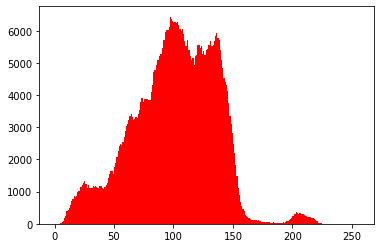

In [4]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

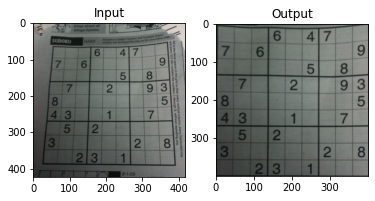

In [5]:
pts1 = np.float32([[53,60],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(400,400))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Task 2.2: **Time Series**

In [6]:
timedata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/ME592X/Assignment1/energydata_complete.csv')
timedata_np = timedata.to_numpy()
timedata_np[1,0]

'1/11/2016 17:10'

Plotting energy consumption of the entire period.  

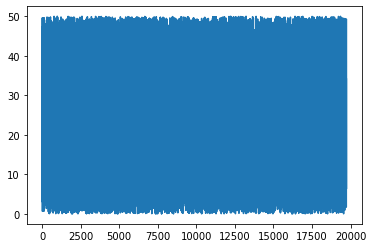

In [ ]:
plt.figure()
plt.plot(timedata_np[:,-1])
plt.show()

Plotting energy consumption of week starting from 1/11/2016 17:00 upto 1/18/2016 16:50

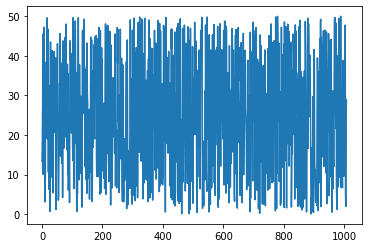

In [ ]:
plt.figure()
plt.plot(timedata_np[0:1008,-1])
plt.show()

Heat map of hourly energy consumption of week starting from 1/11/2016 17:00 upto 1/18/2016 16:50

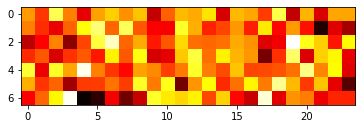

In [ ]:
hc = []
for i in range(0,1008,6):
  hc.append(np.sum(timedata_np[i:i+6,-1]))
hc_np = np.array(hc)
hc_np = hc_np.reshape(7,24)
hc_np.shape 

plt.imshow(hc_np, cmap='hot')
plt.show()

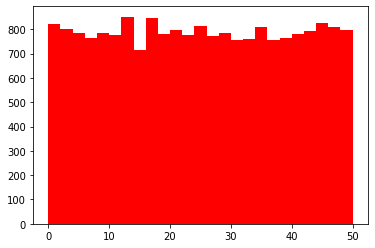

In [ ]:
_ = plt.hist(timedata_np[:,-1],25,[timedata_np[:,-1].min(),timedata_np[:,-1].max()], color = 'r')

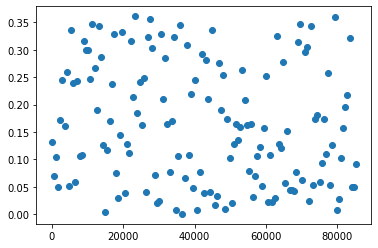

In [ ]:
avgOnsm = np.zeros(143)
nsm = [0]
#avgOnsm.shape
count = 0

for k in range(142):
  nsm.append(nsm[-1]+600) 

len(nsm)
for i in range(43,19627,143):
  count += 1 
  for j in range(0,143):
    avgOnsm[j] = timedata_np[i+j,-1]

avgOnsm = avgOnsm/count

plt.scatter(nsm, avgOnsm)
plt.show()

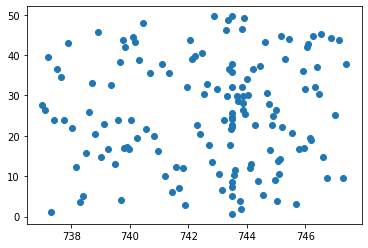

In [ ]:
plt.scatter(timedata_np[43:187,-6], timedata_np[43:187,-1])
plt.show()

Task 2.3: **Multi-Variate**

In [33]:
import numpy as np
import scipy as sp
data = np.loadtxt('/content/mnt/MyDrive/Colab Notebooks/ME592X/Assignment1/airfoil_self_noise.dat')

# Separating out each inputs and outputs from the .dat file
inp1 = data[:, 0]
inp2 = data[:, 1]
inp3 = data[:, 2]
inp4 = data[:, 3]
inp5 = data[:, 4]

output = data[:,-1] # Separating out the Output(Scaled sound pressure level) from the .dat file

In [36]:
from scipy import stats
def stat_metric(qty, name):
  mean = np.mean(qty)
  var = np.var(qty)
  median = np.median(qty)
  kurtosis = stats.kurtosis(qty)
  skew = stats.skew(qty)
  range = np.amax(qty) - np.amin(qty)
  print('######################')
  print(' Stats of %s '%name)
  print('mean = ', mean)
  print('variance = ', var)
  print('median = ', median)
  print('kurtosis = ', kurtosis)
  print('skewness = ', skew)
  print('range = ', range) 
  
  
stat_metric(inp1, 'input1')
stat_metric(inp2, 'input2')
stat_metric(inp3, 'input3')
stat_metric(inp4, 'input4')
stat_metric(inp5, 'input5')
stat_metric(output, 'output')




######################
 Stats of input1 
mean =  2886.3805721889553
variance =  9932104.797280578
median =  1600.0
kurtosis =  5.685722427734417
skewness =  2.1349509268138207
range =  19800.0
######################
 Stats of input2 
mean =  6.782302062541583
variance =  35.00093761467971
median =  5.4
kurtosis =  -0.41556767886742474
skewness =  0.6884764219408198
range =  22.2
######################
 Stats of input3 
mean =  0.13654823685961412
variance =  0.008744046262693067
median =  0.1016
kurtosis =  -1.0385036986844616
skewness =  0.45700080866491105
range =  0.27940000000000004
######################
 Stats of input4 
mean =  50.86074517631405
variance =  242.35026211936292
median =  39.6
kurtosis =  -1.5627427144987867
skewness =  0.2356169672566666
range =  39.599999999999994
######################
 Stats of input5 
mean =  0.011139880391217565
variance =  0.00017281360560925384
median =  0.00495741
kurtosis =  2.2075390546067792
skewness =  1.7004653179096092
range =  0.058